In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('E:/Data_sets')

In [3]:
d = pd.read_csv('heart.csv')
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
df['sex'].replace([1,0],['Male','Female'],inplace = True)

In [7]:
df['chest_pain_type'].replace([0,1,2,3],['Typical Angina Pain','Atypical Angina Pain','Non-Anginal Pain','Asymptomatic Pain'],inplace = True)

In [8]:
df['fasting_blood_sugar'].replace([0,1],['Fasting_blood_sugar < 120','Fasting_blood_sugar > 120'],inplace = True)

In [9]:
df['thalassemia'].replace([0,1,2,3],['Normal','Normal','Fixed Effect','Reversible Effect'],inplace = True)

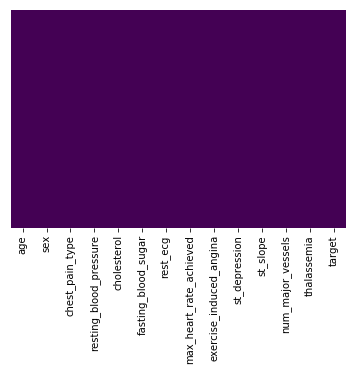

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #No empty values 

# Exploratory Data Analysis

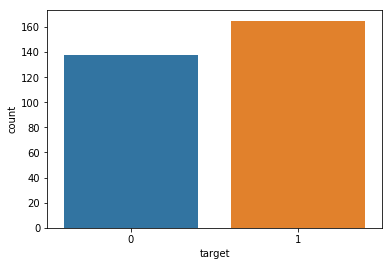

In [11]:
sns.countplot(x = 'target',data = df)

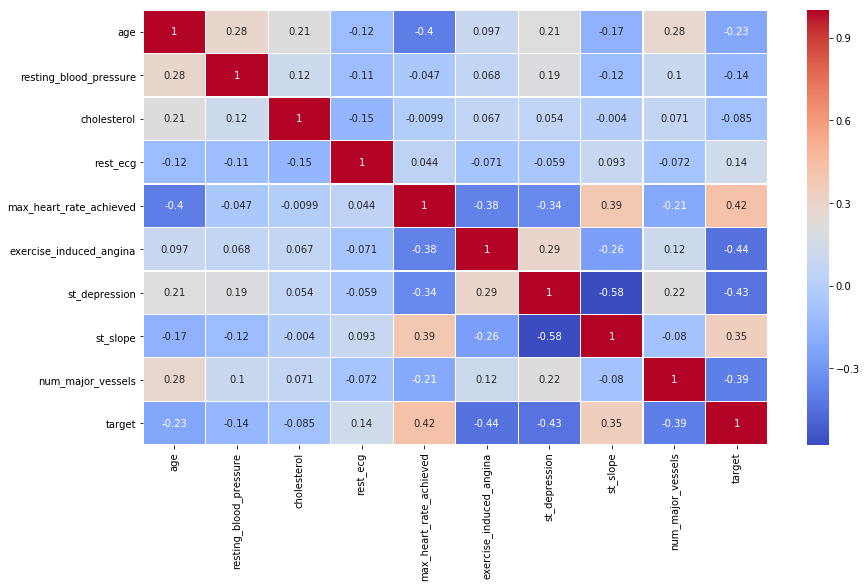

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1) 
#After observing below matrix we observe the our dependent varible is not/least related with fbs, chol, trestbps, restecg as they lies between [0.2, -0.2].
#So, we can remove those varible from the dataset

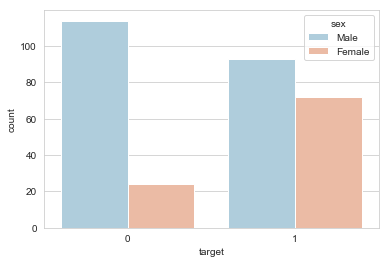

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = df, hue = 'sex',palette='RdBu_r')

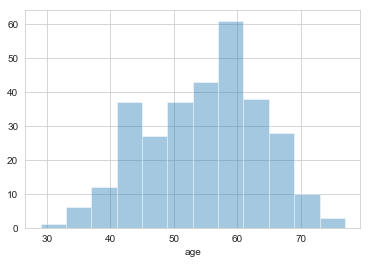

In [14]:
sns.distplot(df['age'],kde = False)

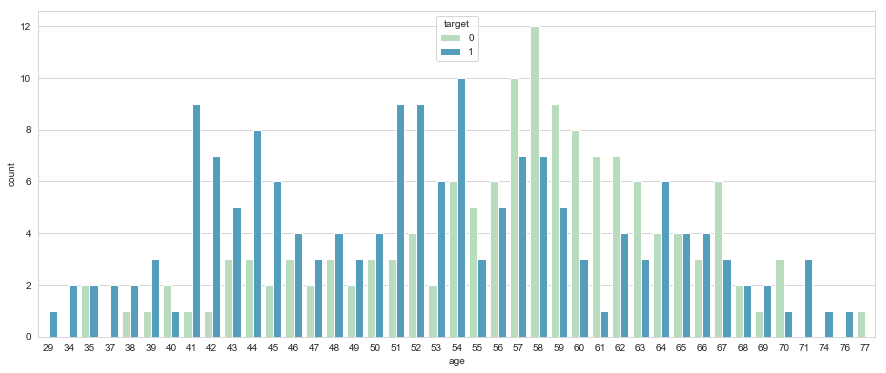

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')

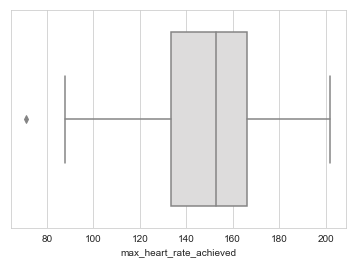

In [16]:
sns.boxplot(x = 'max_heart_rate_achieved',hue = 'target', data = df, palette='coolwarm')

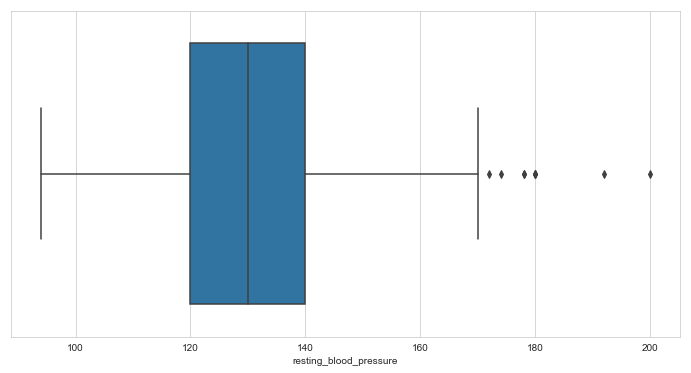

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'resting_blood_pressure',data = df)

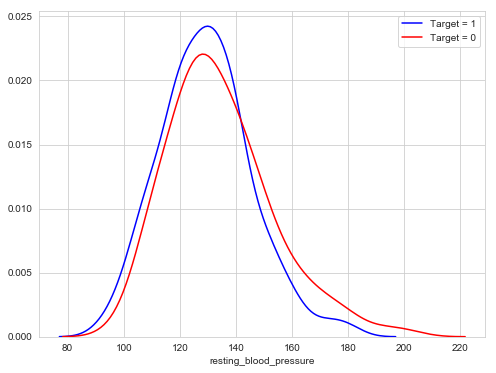

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['target']==1]['resting_blood_pressure'],hist = False, label = 'Target = 1', color = 'blue')
sns.distplot(df[df['target']==0]['resting_blood_pressure'],hist = False, label = 'Target = 0', color = 'red')

#From the above graph, we can observe that patients equal chances of having heart disease irrespective of the value of blood pressure.
#This observation is just opposite to what we thought. So, we can remove this parameter before model implementation.

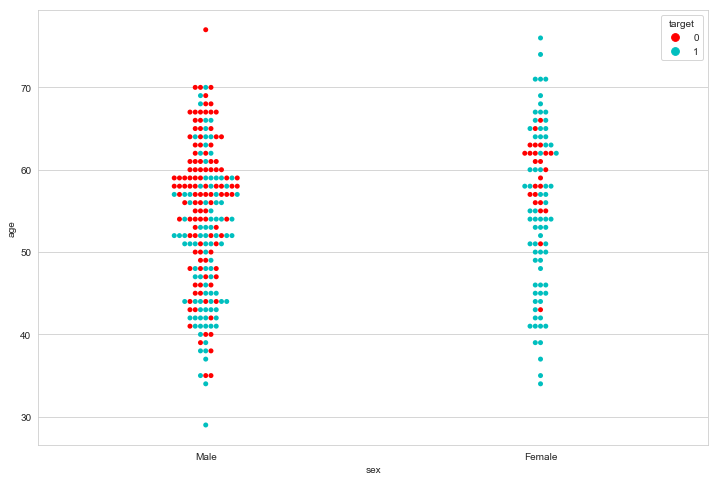

In [19]:
plt.figure(figsize=(12,8))
sns.swarmplot(y="age",x= 'sex',hue='target',
              palette=["r", "c", "y"], data=df)
# Female population of all ages tend to get heart disease
# While males having age less than 55 years are likely to get heart disease

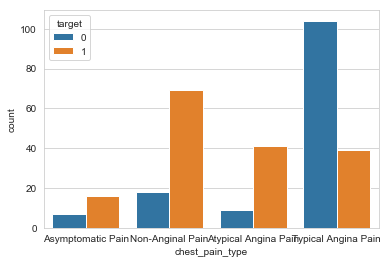

In [20]:
sns.countplot(x ='chest_pain_type',hue = 'target', data = df)

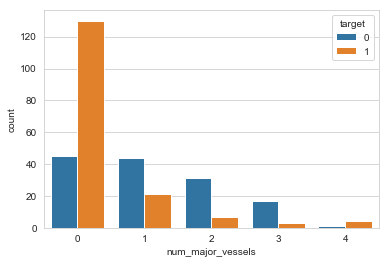

In [21]:
sns.countplot(x ='num_major_vessels',hue = 'target', data = df)

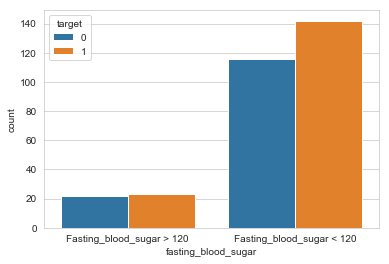

In [22]:
sns.countplot(hue = 'target',x = 'fasting_blood_sugar',data = df)

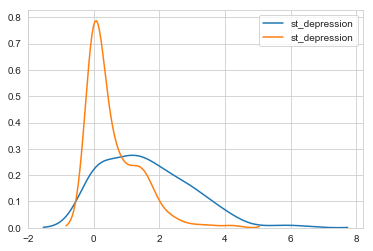

In [23]:
sns.kdeplot(df[df['target']==0]['st_depression'])
sns.kdeplot(df[df['target']==1]['st_depression'])

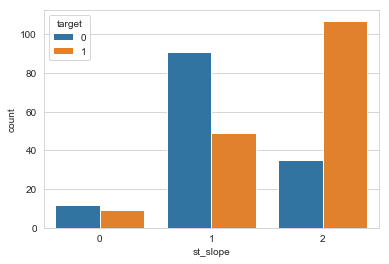

In [24]:
sns.countplot(x = 'st_slope', hue = 'target', data = df)

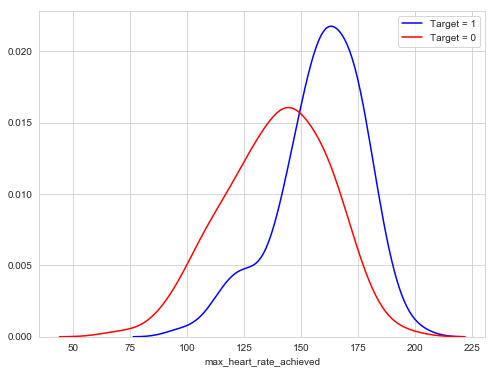

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['target']==1]['max_heart_rate_achieved'],hist = False, label = 'Target = 1', color = 'blue')
sns.distplot(df[df['target']==0]['max_heart_rate_achieved'],hist = False, label = 'Target = 0', color = 'red')

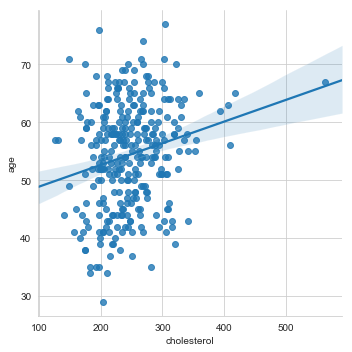

In [26]:
sns.lmplot(x = 'cholesterol', y = 'age', data = df)

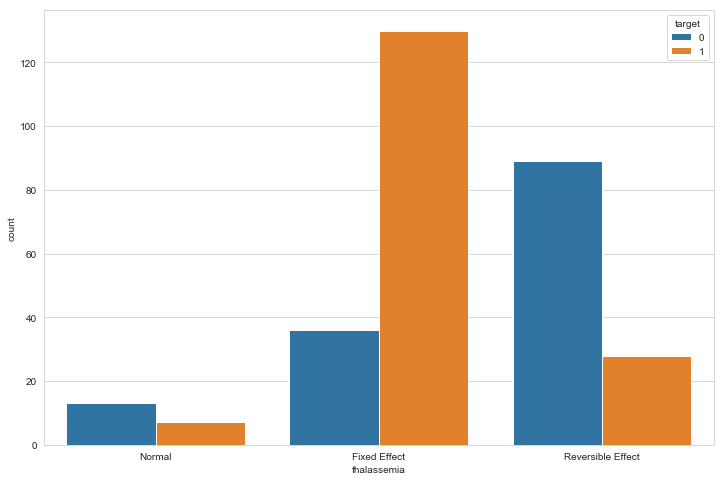

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'thalassemia', hue = 'target', data = df)

# Data Preprocessing

In [366]:
x = d.iloc[:,:-1].values
l =d.iloc[:,:-1].values
y = d.iloc[:,-1].values
n = d.iloc[:,-1]

from sklearn.preprocessing import OneHotEncoder

ht = OneHotEncoder(categorical_features =[2])

x = ht.fit_transform(x).toarray()

C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [271]:
x 

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 2.],
       [0., 1., 0., ..., 2., 0., 2.],
       ...,
       [1., 0., 0., ..., 1., 2., 3.],
       [1., 0., 0., ..., 1., 1., 3.],
       [0., 1., 0., ..., 1., 1., 2.]])

In [272]:
x =pd.DataFrame(x)

list(x.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [273]:
x = x.drop(columns= 1)

In [274]:
x= x.values

In [275]:
x

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 2., 0., 2.],
       ...,
       [1., 0., 0., ..., 1., 2., 3.],
       [1., 0., 0., ..., 1., 1., 3.],
       [0., 0., 0., ..., 1., 1., 2.]])

In [276]:
x =pd.DataFrame(x)

list(x.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [277]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,0.0,1.0,0.0,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,0.0,0.0,0.0,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,0.0,0.0,0.0,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,1.0,0.0,0.0,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
5,1.0,0.0,0.0,57.0,1.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0
6,0.0,0.0,0.0,56.0,0.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0
7,0.0,0.0,0.0,44.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0
8,0.0,1.0,0.0,52.0,1.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0
9,0.0,1.0,0.0,57.0,1.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0


In [278]:
ht = OneHotEncoder(categorical_features =[12])

x = ht.fit_transform(x).toarray()

C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [279]:
x

array([[1. , 0. , 0. , ..., 2.3, 0. , 1. ],
       [1. , 0. , 0. , ..., 3.5, 0. , 2. ],
       [0. , 0. , 1. , ..., 1.4, 0. , 2. ],
       ...,
       [0. , 1. , 0. , ..., 3.4, 2. , 3. ],
       [0. , 1. , 0. , ..., 1.2, 1. , 3. ],
       [0. , 1. , 0. , ..., 0. , 1. , 2. ]])

In [280]:
x =pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,1.0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,0.0,2.0
4,0.0,0.0,1.0,1.0,0.0,0.0,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,0.0,2.0
5,0.0,1.0,0.0,1.0,0.0,0.0,57.0,1.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,56.0,0.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,0.0,2.0
7,0.0,0.0,1.0,0.0,0.0,0.0,44.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,0.0,3.0
8,0.0,0.0,1.0,0.0,1.0,0.0,52.0,1.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,0.0,3.0
9,0.0,0.0,1.0,0.0,1.0,0.0,57.0,1.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,0.0,2.0


In [281]:
x = x.drop(columns= 1)
x= x.values

In [282]:
x

array([[1. , 0. , 0. , ..., 2.3, 0. , 1. ],
       [1. , 0. , 0. , ..., 3.5, 0. , 2. ],
       [0. , 1. , 0. , ..., 1.4, 0. , 2. ],
       ...,
       [0. , 0. , 1. , ..., 3.4, 2. , 3. ],
       [0. , 0. , 1. , ..., 1.2, 1. , 3. ],
       [0. , 0. , 0. , ..., 0. , 1. , 2. ]])

In [283]:
ht = OneHotEncoder(categorical_features =[15])

x = ht.fit_transform(x).toarray()

x =pd.DataFrame(x)

x

C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\DIVINE EMPEROR\AnaconDa\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,57.0,1.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,0.0
7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,44.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,52.0,1.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,1.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,0.0


In [284]:
x = x.drop(columns= 1)
x= x.values

In [285]:
x

array([[0. , 0. , 0. , ..., 0. , 2.3, 0. ],
       [0. , 1. , 0. , ..., 0. , 3.5, 0. ],
       [0. , 1. , 0. , ..., 0. , 1.4, 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 3.4, 2. ],
       [0. , 0. , 1. , ..., 1. , 1.2, 1. ],
       [0. , 1. , 0. , ..., 0. , 0. , 1. ]])

In [373]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[23  5]
 [ 2 31]]


In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)

In [290]:
scaled_features

array([[-0.08151391, -1.10076284, -0.79311554, ..., -0.69663055,
         1.08733806, -0.71442887],
       [-0.08151391,  0.9084609 , -0.79311554, ..., -0.69663055,
         2.12257273, -0.71442887],
       [-0.08151391,  0.9084609 , -0.79311554, ..., -0.69663055,
         0.31091206, -0.71442887],
       ...,
       [-0.08151391, -1.10076284,  1.26085034, ..., -0.69663055,
         2.03630317,  1.24459328],
       [-0.08151391, -1.10076284,  1.26085034, ...,  1.43548113,
         0.13837295,  0.26508221],
       [-0.08151391,  0.9084609 , -0.79311554, ..., -0.69663055,
        -0.89686172,  0.26508221]])

In [292]:
x =pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,57.0,1.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,44.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,52.0,1.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,1.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,0.0


In [337]:
 drop_x = x.drop(columns=[8,10,11,12])

In [378]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit( drop_x)
scaled_features = scaler.transform(drop_x)



In [387]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(drop_x, y, test_size=0.25,random_state =193)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(68,random_state = 15)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
from sklearn.metrics import accuracy_score


[[28  4]
 [ 1 43]]


# Model Metrics

In [380]:
score_rForest = round(accuracy_score(rfc_pred,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rForest)+" %")

The accuracy score achieved using Random Forest is: 93.42 %


In [345]:
max_accuracy = 0
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(drop_x, y, test_size=0.25,random_state =i)
    rf = RandomForestClassifier(68,random_state=15)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_i = i




In [381]:
X_train, X_test, y_train, y_test = train_test_split(drop_x, y, test_size=0.25,random_state =best_i)
rForest = RandomForestClassifier(100,random_state=15)
rForest.fit(X_train,y_train)
Y_pred_rForest = rForest.predict(X_test)

score_rForest = round(accuracy_score(Y_pred_rForest,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rForest)+" %")

The accuracy score achieved using Random Forest is: 92.11 %


In [371]:
# Checking for accuracy paradox
df.iloc[:,-1].value_counts()


1    165
0    138
Name: target, dtype: int64

In [388]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score


In [391]:
recall_score(y_test,rfc_pred)


0.9772727272727273

In [392]:
roc_auc_score(y_test,rfc_pred)

0.9261363636363636